In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
data = pd.read_csv("../share/data.csv").astype({'Bandwidth': 'float'})
bandwidth = data.pivot(index="Link delay", columns='Window size', values='Bandwidth').fillna(0)

#Kbit/sec -> Mbit/sec
bandwidth[(bandwidth > 6)] /= 1024

bandwidth

Window size,1,6,11,16,21,26,31,36,41,46,...,981,986,991,996,1001,1006,1011,1016,1021,1026
Link delay,,,,,,,,,,,,,,,,,,,,,
1,1.92,4.12,4.12,4.14,4.14,4.15,4.15,4.16,4.16,4.16,...,4.29,4.29,4.28,4.28,4.28,4.28,4.28,4.27,4.27,4.27
6,539.00,3.19,4.09,4.11,4.12,4.12,4.12,4.13,4.13,4.14,...,3.82,3.83,3.83,3.84,3.84,3.85,3.85,3.85,3.85,3.85
11,317.00,1.85,3.38,4.07,4.07,4.08,4.08,4.09,4.09,4.10,...,3.69,3.69,3.69,3.70,3.70,3.70,3.70,3.70,3.71,3.71
16,224.00,1.30,2.37,3.42,4.04,4.05,4.05,4.05,4.06,4.06,...,3.56,3.56,3.56,3.56,3.59,3.59,3.59,3.59,3.60,3.60
21,171.00,1.01,1.83,2.62,3.45,4.00,4.00,4.02,4.02,4.02,...,3.46,3.47,3.47,3.46,3.46,3.46,3.49,3.49,3.49,3.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.00,71.20,126.00,158.00,185.00,241.00,264.00,277.00,336.00,352.00,...,1.59,1.59,1.59,1.59,1.65,1.65,1.65,1.65,1.65,1.65
286,0.00,70.00,124.00,156.00,182.00,237.00,260.00,273.00,331.00,347.00,...,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57
291,0.00,68.90,122.00,154.00,179.00,233.00,256.00,269.00,283.00,341.00,...,1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48


In [4]:
X, Y = np.meshgrid(bandwidth.columns,bandwidth.index)

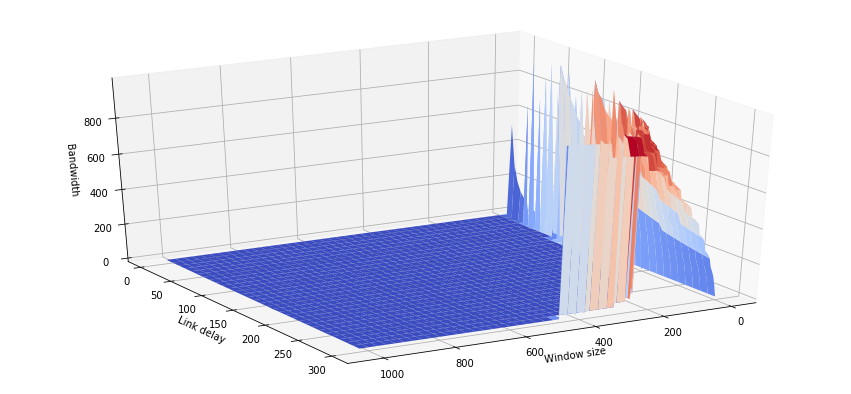

In [5]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, bandwidth.to_numpy(), cmap=cm.coolwarm)
ax.set_xlabel("Window size")
ax.set_ylabel("Link delay")
ax.set_zlabel("Bandwidth")
ax.view_init(30, 120)
plt.savefig("Bandwidth_2.png")
ax.view_init(30, 60)
plt.savefig("Bandwidth_1.png")